# **Importing libraries**


In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor


## **Loading the Data Set**

In [2]:
dataset=pd.read_csv("Boston House Price Data.csv")

In [3]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## **Displaying first 5 and last 5 rows of the data set to get better overview of the data set its types**

In [4]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
dataset.shape

(506, 14)

## **Checking for any missing values to preprocess the DataSet**

In [7]:
dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [8]:
correlation=dataset.corr()

<Axes: >

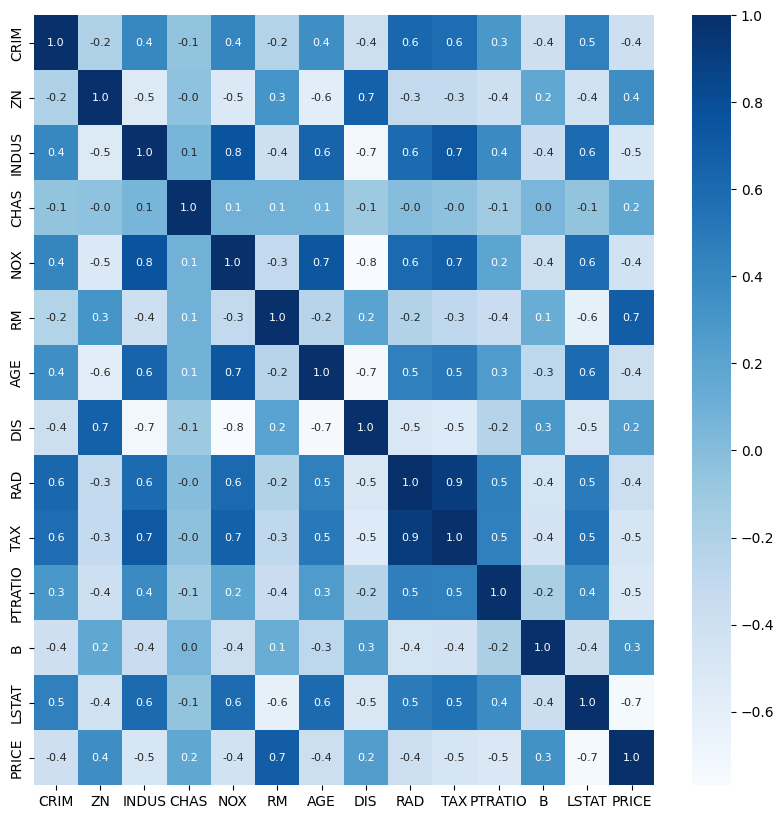

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

## **Separating the features and target of the dataset and assigning them to x and y respectively**

In [10]:
x=dataset.drop('PRICE',axis=1)
y=dataset["PRICE"]

## **Data Splitting for Training and Testing (using `train_test_split` from `sklearn.model_selection`)**

In [356]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46,shuffle=True)

In [357]:
print(x.shape,x_train.shape,x_test.shape)

(506, 13) (404, 13) (102, 13)


## **Training the Linear Regression Model (using `LinearRegression` from `sklearn.linear_model`)**

In [384]:
model_LR=LinearRegression()

In [385]:
model_LR.fit(x_train,y_train)

LinearRegression()

In [388]:
prediction_LR=model_LR.predict(x_test)

In [389]:
prediction_LR

array([20.92079252, 23.9585525 , 17.58694483, 14.17124354, 25.70240819,
       14.52274341, 30.84164166, 17.44247599, 14.85121086, 19.01204902,
       31.98009724, 18.82651335, 22.48969591, 13.9428253 , 22.15851357,
       24.95609938, 31.6504498 , 22.82327129, 21.23164632, 25.38760905,
       19.6272997 , 24.59868488, 20.98831606, 26.91373851, 18.86748002,
       25.98086181, 37.97311202, 24.44090773, 13.16597343, 32.71154419,
       37.19483272, 27.65066413, 17.60349139,  7.39876298, 34.78669203,
       35.04098667, 17.38673906, 16.82582173, 20.22291516, 21.66305891,
       30.76888193, 23.55856817, 26.08157312, 16.027405  , 26.83784981,
       25.1827097 , 22.01934554, 19.23699114, 14.35578823, 30.88206882,
       23.54776493, 22.73912168, 24.80908856, 19.89197961, 29.04248966,
       32.40003273, 35.5775676 , 17.60706581, 17.27090731, 21.24858708,
       32.60206708, 14.25614669, 17.23305195, 13.81750046, 37.05848105,
       18.73163565, 23.70271451, 24.79835293, 31.85350001, 22.49

In [394]:
r2_LR=metrics.r2_score(y_test,prediction_LR)

In [396]:
print(r2_LR*100)

79.16331430085606


In [398]:
MAR=metrics.mean_absolute_error(y_test,prediction_LR)

In [399]:
print(MAR)

2.881819534723491


While Linear Regression provides a baseline, we will explore the XGBoost model to potentially achieve better predictive accuracy by capturing non-linear relationships in the data.

# **Training the XGBoost Regression Model (using `XGBRegressor` from `xgboost`)**

In [400]:
model=XGBRegressor()

In [401]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [402]:
prediction=model.predict(x_test)

In [403]:
print(prediction)

[19.14989   27.604568  13.759294  14.373268  23.548529  18.254326
 24.677517  17.46438   15.6509695 19.480904  27.170053  19.190277
 23.185322  10.184419  19.475111  26.232634  30.015333  21.234575
 20.032509  24.487814  16.553808  29.057156  20.368404  23.893454
 19.629425  23.949018  41.56406   23.489443  19.10295   26.078331
 48.021477  33.470158  16.000673   7.59868   29.113434  32.777954
 20.866194  17.880943  21.459515  22.069357  31.463482  23.26726
 24.84573    9.636307  26.5495    21.527586  18.70659   20.498589
 12.112911  34.495384  19.12193   20.681677  28.622934  21.968246
 23.144436  33.22528   35.846306  16.636904  16.299728  22.462484
 30.606136  16.471294  13.830454  11.084147  46.70677   20.094162
 22.975182  22.615423  27.39767   19.083593  37.820824  21.526333
 14.538201  30.083504  16.489433  19.782091  14.410513  18.038427
 10.460588  20.09812   21.054804  11.30141   17.304895  15.803073
  9.606541  12.14912   23.240942  10.460588  24.773687  20.829708
 10.552679 

In [404]:
score2=metrics.r2_score(y_test,prediction)

In [405]:
print(score2*100)

83.29662815555142


In [406]:
MAR2=metrics.mean_absolute_error(y_test,prediction)

In [408]:
print(MAR2)

2.2087197406619206


In [407]:
input =np.array([[0.04741,	0.0,	11.93,	0.0,	0.573,	6.030,	80.8,	2.5050,	1.0,	273.0,	21.0,	396.90,	7.88,]])
model.predict(input)

array([11.899122], dtype=float32)

### **exporting the xgb model as house_price_prediction**

In [410]:
import pickle
pickle.dump(model,open("house_price_prediction.pkl","wb"))